In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [32]:
df = pd.read_csv('newsData_reduced.csv')
df.head()

,publish_date,headline_text
0,20030219,israeli forces push into gaza strip
1,20030220,packer hands in licence as pistol investigation
2,20030301,sculpture exhibition revealed in tasmania
3,20030301,sydneys gay mardi gras kicks off
4,20030303,car theft sparks internal police probe


In [33]:
df.shape

(2520, 2)

In [36]:
# remove duplicates headlines
df = df.drop_duplicates(subset='headline_text', keep='first')
df = df.reset_index(drop=True)
df.head()

,publish_date,headline_text
0,20030219,israeli forces push into gaza strip
1,20030220,packer hands in licence as pistol investigation
2,20030301,sculpture exhibition revealed in tasmania
3,20030301,sydneys gay mardi gras kicks off
4,20030303,car theft sparks internal police probe


In [37]:
df.shape

(2507, 2)

In [17]:
vec_bow = CountVectorizer(stop_words='english', lowercase=True)
X_bow = vec_bow.fit_transform(df['headline_text'])

bow_df = pd.DataFrame(X_bow.toarray(), columns=vec_bow.get_feature_names_out())
bow_df.head()

,02,0609,0705,10,100,100000,100m,10pc,10yo,11,...,ypres,zealand,zidane,zim,zimbabwe,zinc,zone,zones,zoo,zvi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
vec_tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X_tfidf = vec_tfidf.fit_transform(df['headline_text'])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vec_tfidf.get_feature_names_out())
tfidf_df.head()

,02,0609,0705,10,100,100000,100m,10pc,10yo,11,...,ypres,zealand,zidane,zim,zimbabwe,zinc,zone,zones,zoo,zvi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# another implementation with more visualization

lda_tfidf = LatentDirichletAllocation(
    n_components=40,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda_tfidf.fit(X_tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=40, random_state=0)

In [57]:
# another implementation with more visualization

lda_bow = LatentDirichletAllocation(
    n_components=35,
    max_iter=1,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda_bow.fit(X_bow)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=1, n_components=35, random_state=0)

In [62]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(8, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    # plt.savefig('topics.png')


[[0.04094328 0.03893099 0.04110328 ... 0.03830973 0.0375399  0.03960358]
 [0.03817292 0.039514   0.03930174 ... 0.03812825 0.04092453 0.03756191]
 [0.03978884 0.03693586 0.03797251 ... 0.03890312 0.03919972 0.03750946]
 ...
 [0.03787859 0.04029531 0.04014532 ... 0.04009057 0.03865074 0.03862086]
 [0.03913194 0.03773699 0.03949522 ... 0.47779347 0.03835049 0.03861778]
 [0.0385259  0.03834943 0.03672072 ... 0.03766471 0.04029448 0.0381037 ]]


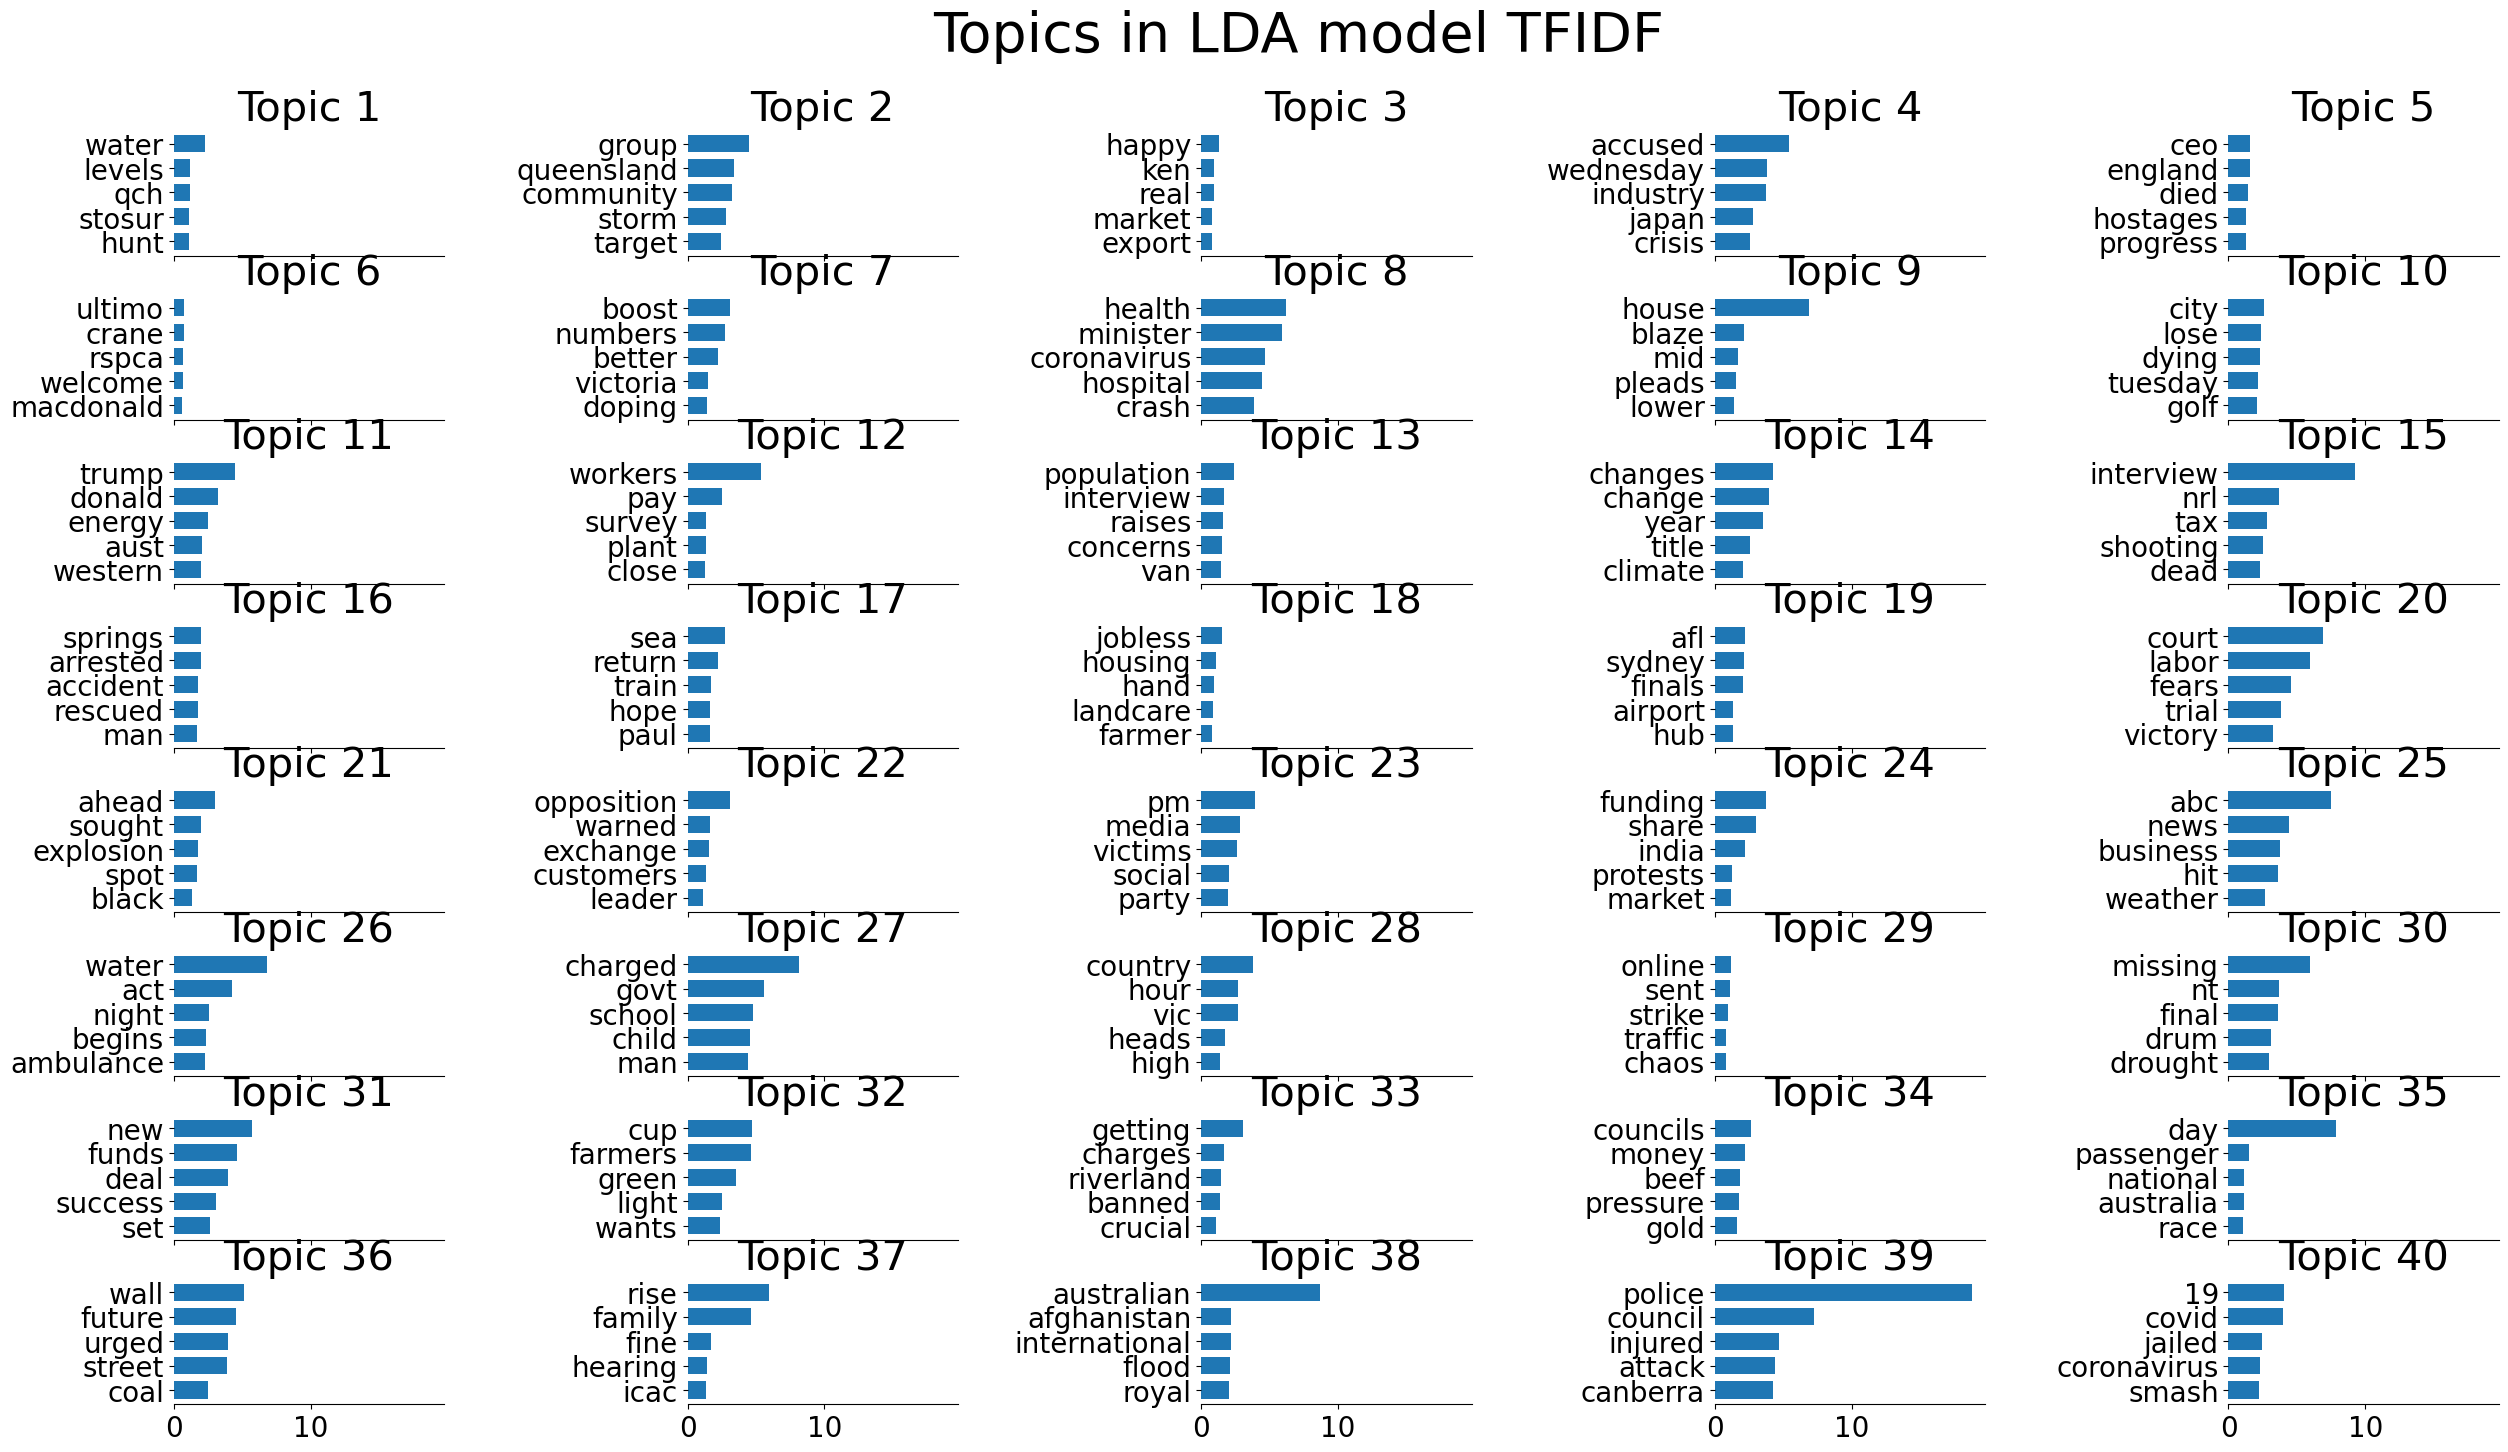

In [63]:
print(lda_tfidf.components_)

plot_top_words(lda_tfidf, vec_tfidf.get_feature_names_out(), 5, "Topics in LDA model TFIDF")

[[0.38629246 0.34100282 0.38989335 ... 0.32702052 0.30969433 0.35614055]
 [0.3239414  0.35412434 0.3493471  ... 0.32293587 0.38587051 0.31018958]
 [0.36030998 0.29609938 0.31943082 ... 0.34037546 0.34705099 0.30900924]
 ...
 [0.31891474 0.34590099 0.29978676 ... 0.40041739 0.32134024 0.33323709]
 [0.29980992 0.3725178  0.35252198 ... 0.26693218 0.34697126 0.28607883]
 [0.30968306 0.30933633 0.332912   ... 0.29602221 0.31821274 0.34013992]]


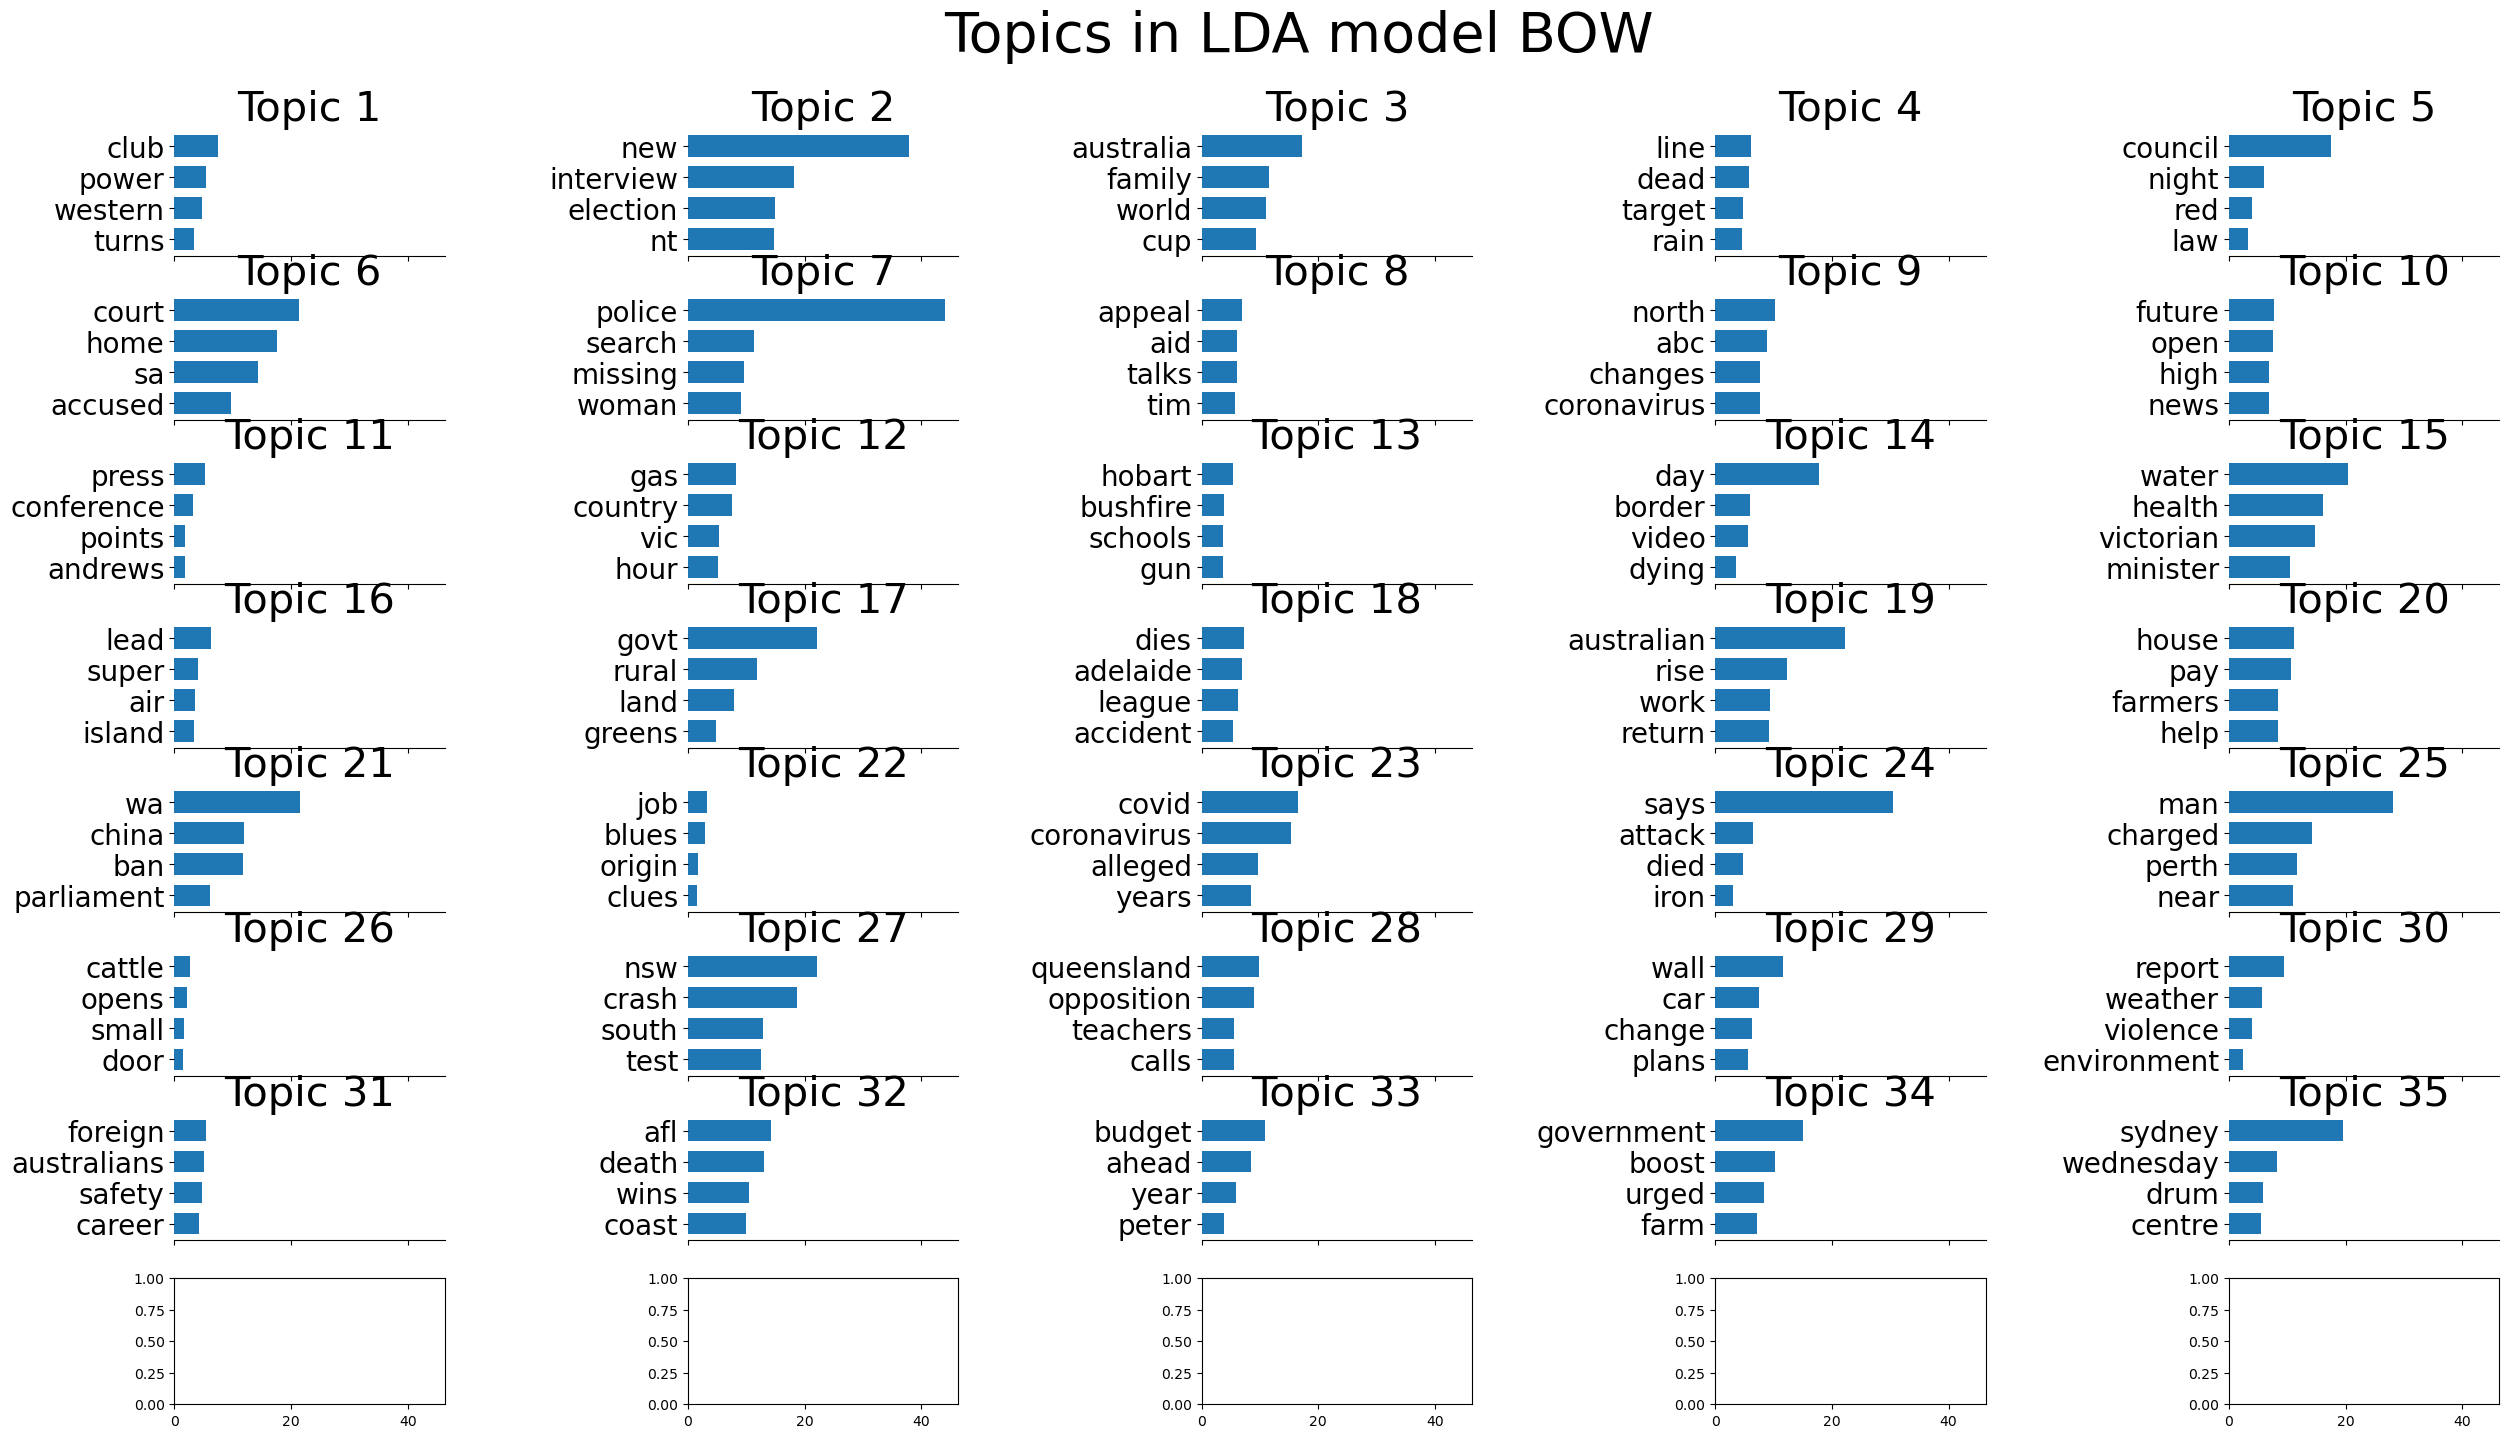

In [64]:
print(lda_bow.components_)

plot_top_words(lda_bow, vec_bow.get_feature_names_out(), 4, "Topics in LDA model BOW")

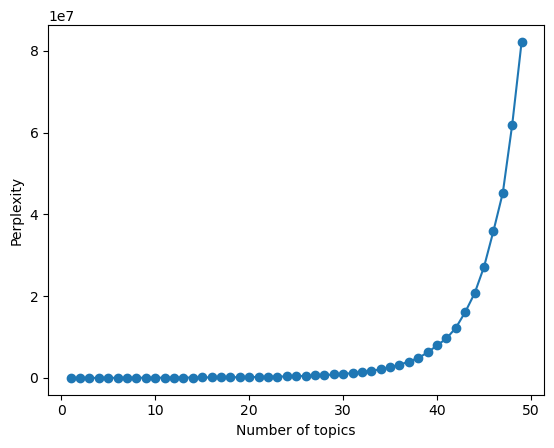

In [54]:
# find optimal amount of topics with perplexity and elbow method

n_topics = 50
perplexity = []
for n in range(1,n_topics):
    lda = LatentDirichletAllocation(n_components=n, max_iter=5, learning_method='online', learning_offset=50.0, random_state=0)
    lda.fit(X_tfidf)
    perplexity.append(lda.perplexity(X_tfidf))

plt.plot(range(1,n_topics), perplexity, marker='o')
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')
plt.show()


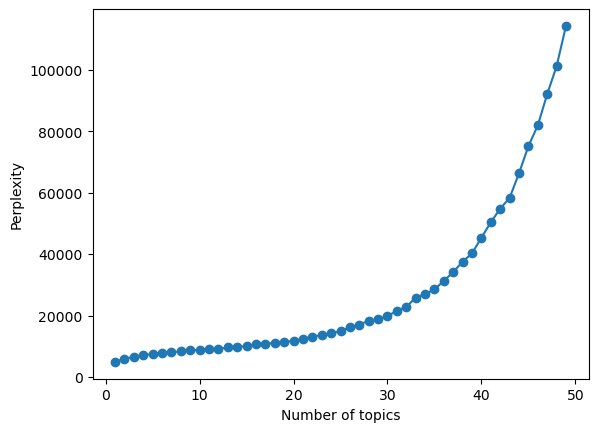

In [55]:
# find optimal amount of topics with perplexity and elbow method

n_topics = 50
perplexity = []
for n in range(1,n_topics):
    lda = LatentDirichletAllocation(n_components=n, max_iter=5, learning_method='online', learning_offset=50.0, random_state=0)
    lda.fit(X_bow)
    perplexity.append(lda.perplexity(X_bow))

plt.plot(range(1,n_topics), perplexity, marker='o')
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')
plt.show()
